# GARDEN PROJECT &#x1F33B;
---

In [2]:
# PACKAGES & SETTINGS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scratch.my_funcs import show_data_overview, show_crop_overview, show_n_by_col

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
# READ IN DATA
harvest_df = pd.read_csv("harvest_2020.csv")
harvest_df = harvest_df.rename(columns= {'vegetable': 'crop'})

In [10]:
# DATA OVERVIEW
print(show_data_overview(harvest_df))


There are 781 rows and 5 columns in the dataframe.

Here is a quick view of the data in the dataframe:
      crop           variety        date  weight  units
0  lettuce            reseed  2020-06-06      20  grams
1   radish  Garden Party Mix  2020-06-06      36  grams
2  lettuce            reseed  2020-06-08      15  grams
3  lettuce            reseed  2020-06-09      10  grams
4   radish  Garden Party Mix  2020-06-11      67  grams

And here are the summary statistics:
            crop variety        date       weight  units
count        781     781         781   781.000000    781
unique        31      64         114          NaN      1
top     tomatoes   grape  2020-09-19          NaN  grams
freq         263      39          45          NaN    781
mean         NaN     NaN         NaN   553.463508    NaN
std          NaN     NaN         NaN   825.441737    NaN
min          NaN     NaN         NaN     2.000000    NaN
25%          NaN     NaN         NaN    94.000000    NaN
50%      

---
# IN-DEPTH EDA 	&#x1F50D;
---

### Frequency of Harvest &#x1F336;
Task 1: determine which crops were harvested the *most* <br>
Task 2: determine which crops were harvested the *least* <br>

In [5]:
## Harvest Frequency by Crop
harvest_count_df = harvest_df.groupby(["crop"])["date"].count().reset_index().rename(columns= {'date':'harvest frequency'})
top_n_freq, bottom_n_freq = show_n_by_col(harvest_count_df, "harvest frequency", 5, 5)


Top 5 Harvested Crops:
         crop  harvest frequency
29  tomatoes                263
17   lettuce                 69
4      beans                 38
30  zucchini                 37
27    squash                 34 


Bottom 5 Harvested Crops:
          crop  harvest frequency
1       apple                  1
2   asparagus                  1
8      chives                  1
16   kohlrabi                  1
9    cilantro                  3 



### Crop Harvest Yields &#x1F345;	
Task 1: determine the *most* productive crops by total weight <br>
Task 2: determine the *least* productive crops by total weight <br>
Task 3: plot most and least productive crops by total weight <br>


Top 5 Harvested Crops:
          crop  total weight
29   tomatoes        158231
22   pumpkins         70155
30   zucchini         45227
27     squash         44917
11  cucumbers         19781 


Bottom 5 Harvested Crops:
          crop  total weight
8      chives             8
2   asparagus            20
9    cilantro            52
1       apple           156
16   kohlrabi           191 



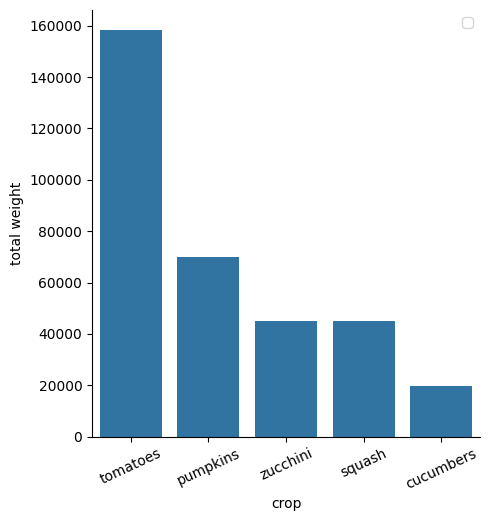

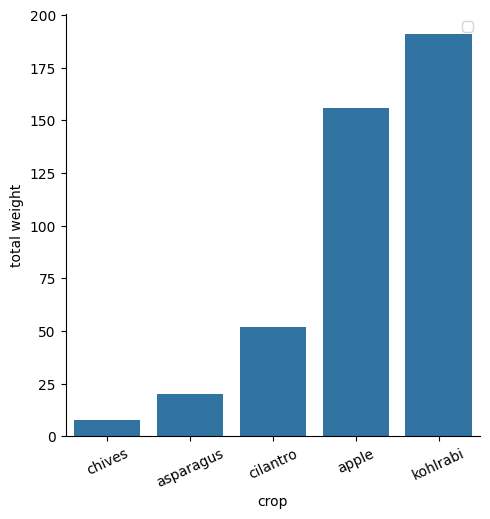

In [11]:
## Crop Yields by Harvest Weight
harvest_weight_sum_df = harvest_df.groupby(["crop"])["weight"].sum().reset_index().rename(columns= {'weight':'total weight'})
top_n_weight, bottom_n_weight = show_n_by_col(harvest_weight_sum_df, "total weight", 5, 5)

sns.catplot(data=top_n_weight, x="crop", y="total weight", kind='bar', errorbar=None, legend_out=False)
plt.xticks(rotation=25)
plt.show()
plt.clf()
plt.close()

sns.catplot(data=bottom_n_weight, x="crop", y="total weight", kind='bar', errorbar=None, legend_out=False)
plt.xticks(rotation=25)
plt.show()
plt.clf()
plt.close()

### Crop Harvest Yields by Variety &#x1F33F;
Task 1: determine the *most* productive crop varieties by total weight <br>
Task 2: determine the *least* productive crop varieties by total weight <br>
Task 3: plot most and least productive crop varieties by total weight <br>

In [12]:
## Crop Variety Productivity by Harvest Weight
unique_crops = harvest_df["crop"].unique() #.astype(str).tolist()
crop_dict = dict.fromkeys(unique_crops)

for crop in unique_crops:
    crop_list = harvest_df.loc[harvest_df["crop"] == crop]
    grouped_crop_var = crop_list.groupby(["variety"])["weight"].sum().reset_index().rename(columns= {'weight':'total weight'})
    crop_dict[crop] = grouped_crop_var.sort_values(by=["total weight"], ascending=False)[0:5]

print(unique_crops)
show_crop_overview(crop_dict)

['lettuce' 'radish' 'spinach' 'beets' 'kale' 'peas' 'chives'
 'strawberries' 'asparagus' 'Swiss chard' 'cilantro' 'basil' 'raspberries'
 'zucchini' 'beans' 'cucumbers' 'tomatoes' 'onions' 'jalapeño'
 'hot peppers' 'carrots' 'peppers' 'broccoli' 'potatoes' 'edamame' 'corn'
 'pumpkins' 'squash' 'kohlrabi' 'apple' 'rutabaga']


What crop are you interested in?
 carrots


,variety,total weight
0,Bolero,3761
1,Dragon,1862
2,King Midas,1858
3,greens,169
